<h2>Plot a swath of NASA HIWRAP data</h2>

In [1]:
# Load the needed packages
import os
import matplotlib.pyplot as plt
import numpy as np

import awot
from awot.graph.common import create_basemap
from awot.graph import RadarVerticalPlot

%matplotlib inline

Supply input data and plotting characteristics. Let's use some data from the GRIP and IPHex field campaigns from 2010 and 2014, respectively. <br>
Data and specifications were found at: http://har.gsfc.nasa.gov/index.php?section=47
and 

In [2]:
Project = "GRIP"
ncfileKu = "grip_hiwrap_kuouterchirp_20100924_024154-031000.nc"
ncfileKa = "grip_hiwrap_kainnerchirp_20100924_024154-031000.nc"

hiwfKu = os.path.join("/Users/guy/data/grip/hiwrap", ncfileKu)
hiwfKa = os.path.join("/Users/guy/data/grip/hiwrap", ncfileKa)

altmin, altmax = 0., 20000.
# Ku 
refminKu, refmaxKu = -10., 30.
velminKu, velmaxKu = -30., 30. # Nyquist

# Ka
refminKa, refmaxKa = -15., 40.
velminKa, velmaxKa = -20., 20. #-97.4, 97.4 # Nyquist

Read in the HIWRAP netcdf data

In [3]:
hirKu = awot.io.read_hiwrap_netcdf(hiwfKu)
hirKa = awot.io.read_hiwrap_netcdf(hiwfKa)
hirKa.keys(), hirKa['fields'].keys()

(['surface',
  'height',
  'surface_gate',
  'vert_aircraft_velocity',
  'pitch',
  'tilt',
  'altitude',
  'platform',
  'flight_number',
  'latitude',
  'roll',
  'metadata',
  'track',
  'east_ground_speed',
  'rotation',
  'north_ground_speed',
  'fields',
  'data_format',
  'longitude',
  'project',
  'range',
  'time',
  'heading',
  'vert_speed'],
 ['velocity', 'power', 'reflectivity'])

In [4]:
print("Reflectivity Min/Max = %f / %f \n"
      "Velocity Min/Max = %f / %f \n"
      "Range Min/Max = %f / %f \n"
      "Altitude Min/Max = %f / %f \n"
      "Height Min/Max = %f / %f \n"
      "Surface Min/Max = %f / %f \n"%(
        hirKa['fields']['reflectivity']['data'].min(),hirKa['fields']['reflectivity']['data'].max(),
        hirKa['fields']['velocity']['data'].min(),hirKa['fields']['velocity']['data'].max(),
        hirKa['range']['data'].min(), hirKa['range']['data'].max(),
        hirKa['altitude']['data'].min(), hirKa['altitude']['data'].max(),
        hirKa['height']['data'].min(), hirKa['height']['data'].max(),
        hirKa['surface']['data'].min(), hirKa['surface']['data'].max()))
print(hirKa['time']['data'].min(), hirKa['time']['data'].max())
#print(hirKa['surface_gate']['data'].shape, hirKa['range']['data'].shape, hirKa['altitude']['data'].shape)
hirKa['fields']['reflectivity']['data'].shape, hirKa['height']['data'].shape

Reflectivity Min/Max = -68.177307 / 56.126274 
Velocity Min/Max = -68.518639 / 68.514503 
Range Min/Max = 100.000000 / 24400.000000 
Altitude Min/Max = 18372.859375 / 18558.835938 
Height Min/Max = -6027.140625 / 18458.835938 
Surface Min/Max = -6008.441406 / 1508.433594 

(datetime.datetime(2010, 9, 24, 2, 41, 54), datetime.datetime(2010, 9, 24, 3, 11, 9, 781250))


((72580, 161), (72580, 161))

Plot a GRIP profile from the Ka band radar

/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


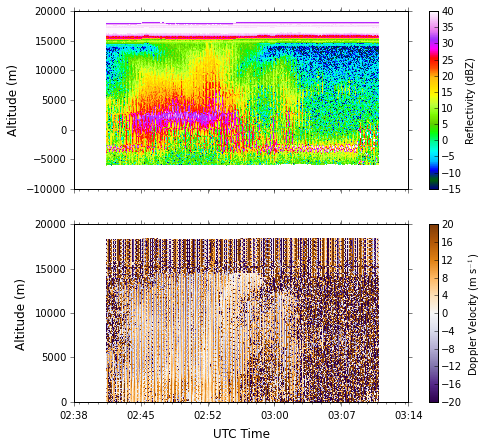

In [5]:
title = "HIWRAP Ka, GRIP 2010-09-24"
grip_start = "2010-09-24 07:20:35"
grip_end = "2010-09-24 07:25:37"

fig, (ax1grip, ax2grip) = plt.subplots(2, 1, figsize=(7.5,7), sharex=True)
hrp = RadarVerticalPlot(hirKa)
hrp.time_height_image('reflectivity', ax=ax1grip, plot_log10_var=False,
#                      start_time=start_time, end_time=end_time,
                      vmin=refminKa, vmax=refmaxKa,
#                      fill_surface=True,
                      cb_label=r'Reflectivity (dBZ)',
#                      height_min=altmin, height_max=altmax, title=file,
                      ylab=r'Altitude (m)', ylabFontSize=12)
              
hrp.time_height_image('velocity', ax=ax2grip, plot_log10_var=False,
#                      start_time=start_time, end_time=end_time,
                      vmin=velminKa, vmax=velmaxKa,
                      cmap="PuOr_r",
#                      fill_surface=True,
                      cb_label=r'Doppler Velocity (m s$^{-1}$)',
                      height_min=altmin, height_max=altmax,
                      ylab=r'Altitude (m)', ylabFontSize=12,
                      xlab='UTC Time', xlabFontSize=12)

#ax2grip.fill_between(hirKa['time']['data'][:], -10000., hirKa['surface']['data'][:])

Now let's read in HIWRAP data in HDF format from the IPHex field campaign: http://har.gsfc.nasa.gov/index.php?section=55

In [6]:
Project = "IPHeX"
h5fileKu = "IPHEX_HIWRAP_L1B_2014608-195710-2014608-203245_HKu_dist_v01.h5"
h5fileKa = "IPHEX_HIWRAP_L1B_2014608-185749-2014608-200216_HKa_dist_v01.h5"

h5rKu = os.path.join("/Users/guy/data/iphex/hiwrap", h5fileKu)
h5rKa = os.path.join("/Users/guy/data/iphex/hiwrap", h5fileKa)

In [7]:
h5Ku = awot.io.read_hiwrap_h5(h5rKu)
h5Ka = awot.io.read_hiwrap_h5(h5rKa)
h5Ku.keys()

surface_power does not exist in file...
surface_velocity does not exist in file...
surface_power does not exist in file...
surface_velocity does not exist in file...


['vert_aircraft_velocity',
 'antenna_elevation_angle',
 'surface',
 'height',
 'surface_gate',
 'surface_doppler_velocity',
 'pitch',
 'altitude',
 'platform',
 'flight_number',
 'latitude',
 'roll',
 'metadata',
 'track',
 'east_ground_speed',
 'north_ground_speed',
 'fields',
 'profile_start_range',
 'data_format',
 'longitude',
 'project',
 'range',
 'time',
 'radar_name',
 'heading',
 'vert_speed']

In [8]:
print("Reflectivity Min/Max = %f / %f \n"
      "Velocity Min/Max = %f / %f \n"
      "Range Min/Max = %f / %f \n"
      "Altitude Min/Max = %f / %f \n"
      "Surface Min/Max = %f / %f \n"%(
        h5Ku['fields']['reflectivity']['data'].min(),h5Ku['fields']['reflectivity']['data'].max(),
        h5Ku['fields']['velocity']['data'].min(),h5Ku['fields']['velocity']['data'].max(),
        h5Ku['range']['data'].min(), h5Ku['range']['data'].max(),
        h5Ku['altitude']['data'].min(), h5Ku['altitude']['data'].max(),
        h5Ku['surface']['data'].min(), h5Ku['surface']['data'].max()))
print(h5Ku['time']['data'].min(), h5Ku['time']['data'].max())
#print(hirKa['surface_gate']['data'].shape, hirKa['range']['data'].shape, hirKa['altitude']['data'].shape)
h5Ku['fields']['reflectivity']['data'].shape, h5Ku['height']['data'].shape

Reflectivity Min/Max = nan / nan 
Velocity Min/Max = nan / nan 
Range Min/Max = nan / nan 
Altitude Min/Max = 20038.931641 / 20324.601562 
Surface Min/Max = -1720.041016 / 6018.639648 

(datetime.datetime(2014, 6, 8, 19, 57, 10, 29179), datetime.datetime(2014, 6, 8, 20, 33, 58, 97790))


((8439, 892), (8439, 892))

Plot a profile from IPHex using the Ku band radar

/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/colors.py:584: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


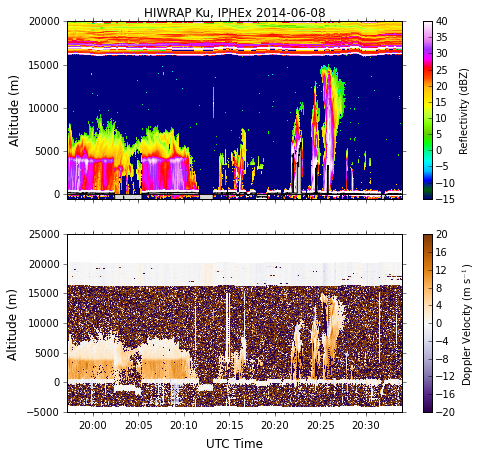

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.5,7), sharex=True)
title = "HIWRAP Ku, IPHEx 2014-06-08"
iphexp = RadarVerticalPlot(h5Ku)
iphexp.time_height_image('reflectivity', ax=ax1, plot_log10_var=False,
#                      start_time="2014-06-08 19:45:00Z", end_time="2014-06-08 20:30:00Z",
                      vmin=refminKa, vmax=refmaxKa,
                      fill_surface=True,
                      cb_label=r'Reflectivity (dBZ)',
                      height_min=-500, height_max=20000., title=title,
                      ylab=r'Altitude (m)', ylabFontSize=12)
              
iphexp.time_height_image('velocity', ax=ax2, plot_log10_var=False,
#                      start_time=start_time, end_time=end_time,
                      vmin=velminKa, vmax=velmaxKa,
                      cmap="PuOr_r",
                      cb_label=r'Doppler Velocity (m s$^{-1}$)',
#                      height_min=altmin, height_max=altmax,
                      ylab=r'Altitude (m)', ylabFontSize=12,
                      xlab='UTC Time', xlabFontSize=12)

#ax2.fill_between(hirKa['time']['data'][:], -10000., hirKa['surface']['data'][:])